In [1]:
%load_ext autoreload

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import mode
from skimage import io

from tkinter import *
import os

from typing import List

from easyimages import EasyImageList


In [3]:
os.chdir("..")

In [4]:
from src.Ingestion import prepare_df
from src.EDA import get_leaf_folders
from src.EDA import create_EIL_from_directory
from src.EDA import plot_counts
from src.EDA import plot_img_size
from src.EDA import aspect_ratio_plot
from src.EDA import canny_edge_plot

In [5]:
path = "C:/Users/Justin/Desktop/AI CV/Explainable-AI/data"

In [6]:
df = prepare_df(path)

In [7]:
df

,file_path,label,usage,size,aspect_ratio
0,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(1106, 762)",1.451444
1,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(1024, 680)",1.505882
2,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(1128, 624)",1.807692
3,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(904, 552)",1.637681
4,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,bacteria,test,"(880, 536)",1.641791
...,...,...,...,...,...
5851,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,normal,val,"(1564, 1302)",1.201229
5852,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,virus,val,"(1216, 672)",1.809524
5853,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,virus,val,"(1200, 784)",1.530612
5854,C:/Users/Justin/Desktop/AI CV/Explainable-AI/d...,virus,val,"(984, 624)",1.576923


In [8]:
l_folders = get_leaf_folders(path=path)
l_folders

['C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\test\\bacteria',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\test\\normal',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\test\\virus',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\train\\bacteria',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\train\\normal',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\train\\virus',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\val\\bacteria',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\val\\normal',
 'C:/Users/Justin/Desktop/AI CV/Explainable-AI/data\\val\\virus']

In [9]:
create_EIL_from_directory(subfolder=l_folders[0],sample=50,size=68)


OSError: [WinError 1314] A required privilege is not held by the client: 'C:\\Users\\Justin\\Desktop\\AI CV\\Explainable-AI\\data\\test\\bacteria\\person100_bacteria_475.jpeg' -> 'temp_link\\person100_bacteria_475.jpeg'

In [ ]:
create_EIL_from_directory(subfolder=l_folders[1],sample=50,size=68)

OSError: [WinError 1314] A required privilege is not held by the client: 'C:\\Users\\Justin\\Desktop\\AI CV\\Explainable-AI\\data\\test\\normal\\IM-0001-0001.jpeg' -> 'temp_link\\IM-0001-0001.jpeg'

In [10]:
create_EIL_from_directory(subfolder=l_folders[2],sample=50,size=68)

OSError: [WinError 1314] A required privilege is not held by the client: 'C:\\Users\\Justin\\Desktop\\AI CV\\Explainable-AI\\data\\test\\virus\\person10_virus_35.jpeg' -> 'temp_link\\person10_virus_35.jpeg'

In [11]:
%matplotlib inline

In [12]:
plt.style.use('seaborn-v0_8-muted')

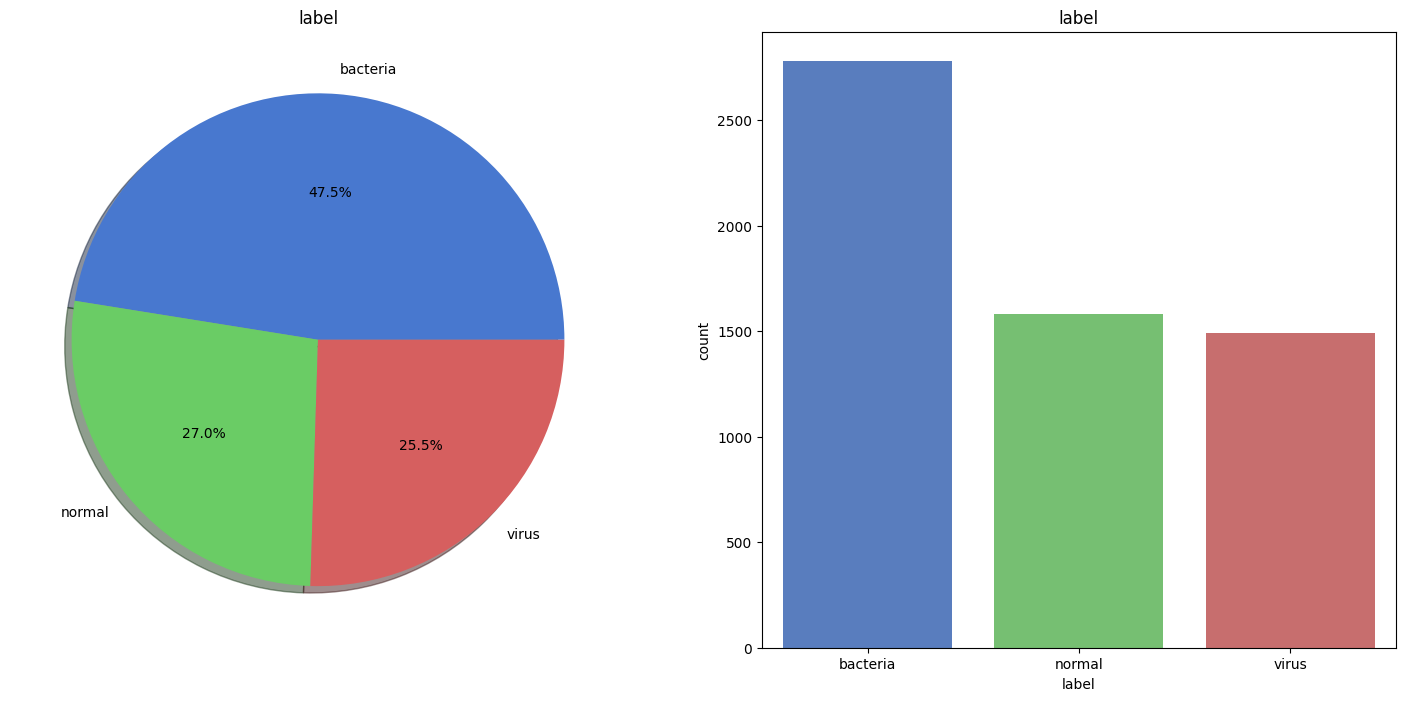

In [13]:
plot_counts(df,"label")

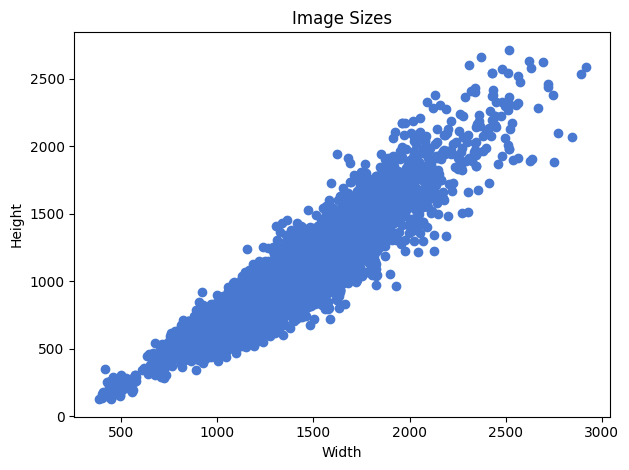

In [14]:
plot_img_size(df,"size")

In [15]:
df['aspect_ratio'].describe()

count    5856.000000
mean        1.442986
std         0.254356
min         0.835391
25%         1.261627
50%         1.415885
75%         1.585750
max         3.378788
Name: aspect_ratio, dtype: float64

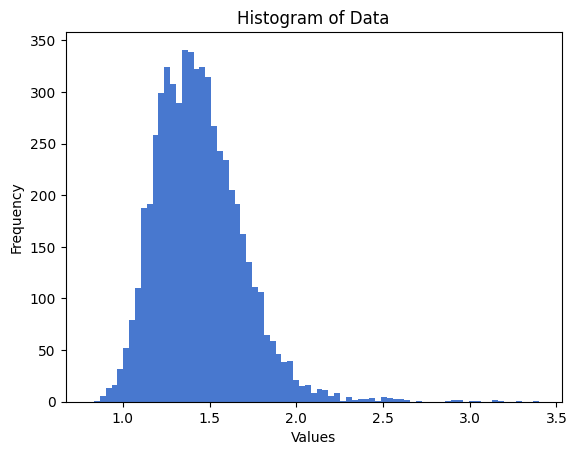

In [16]:
# Define the number of bins and range
num_bins = 77
range_min = 0.8
range_max = 3.4

aspect_ratio_plot(df,"aspect_ratio",num_bins,range_min,range_max)

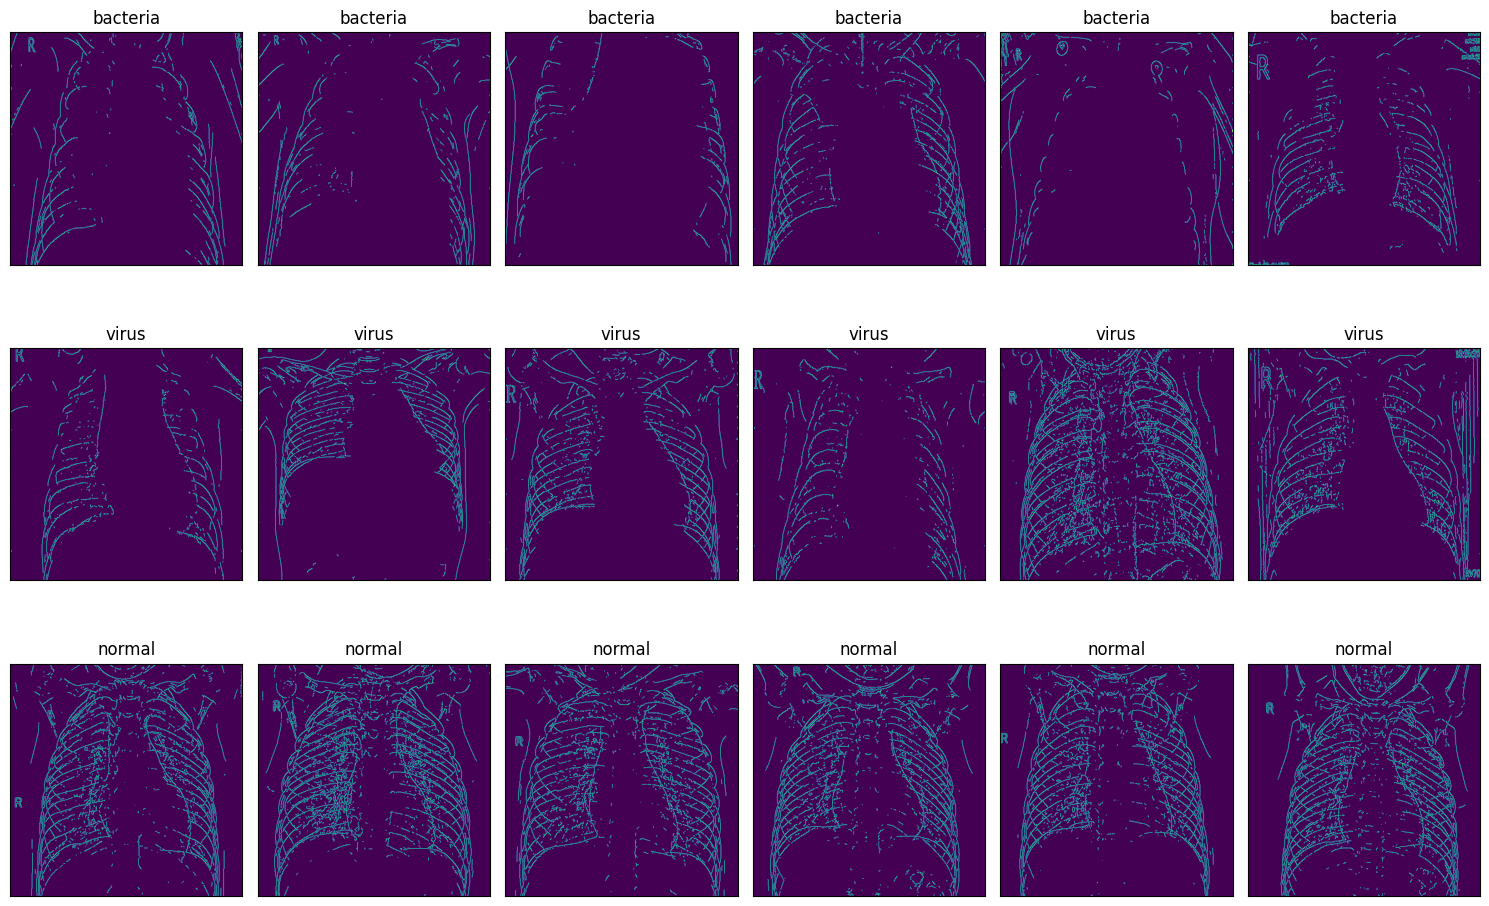

In [17]:
canny_edge_plot(df, ['bacteria', 'virus', 'normal'],'label', 'file_path')